In [31]:
import os
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style="dark")

ROOT = "/home/aki/IdeaProjects/yelp-analytics/etl/data"

BUSINESSS_BY_CITY = "businessByCity"
BUSINESSS_BY_IS_OPEN = "businessByIsOpen"
BUSINESSS_BY_REVIEWS = "businessByReviews"
BUSINESSS_BY_CHECKINS = "businessCheckins"
TOP_REVIEWS = "topReviews"
WORST_REVIEWS = "worstReviews"
BUSINESSS_BY_TRENDING = "trendingBusiness"
USER_DETAILS = "userDetails"
CHECKIN_STATS = "checkinStats"

In [2]:
def read_csv(path: str) -> pd.DataFrame:
    path = os.path.join(ROOT, path)
    for file_name in os.listdir(path):
        splitted = file_name.split(".")
        if len(splitted) == 2 and splitted[1] == "csv":
            full_path = os.path.join(path, file_name)
            return pd.read_csv(full_path)

In [3]:
df = read_csv(BUSINESSS_BY_CITY)

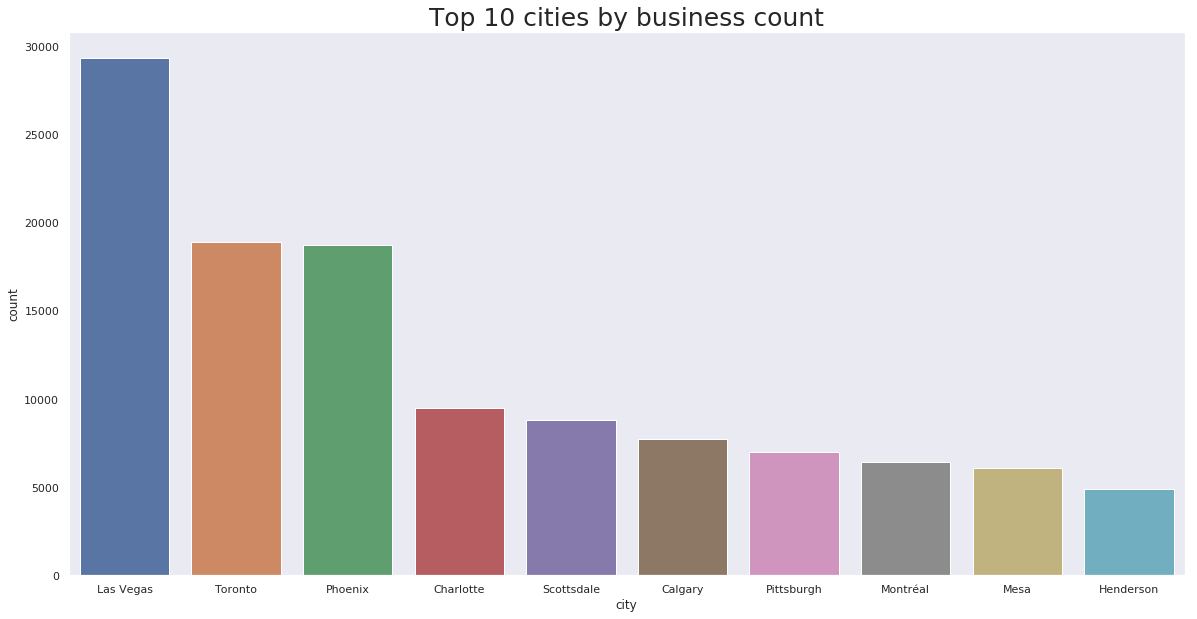

In [4]:
plt.figure(figsize=(20, 10))
ax = sns.barplot(x="city", y="count", data=df.head(10)).set_title("Top 10 cities by business count", fontsize=25)

In [5]:
df = read_csv(BUSINESSS_BY_REVIEWS).sort_values(by="review_count", ascending=False)

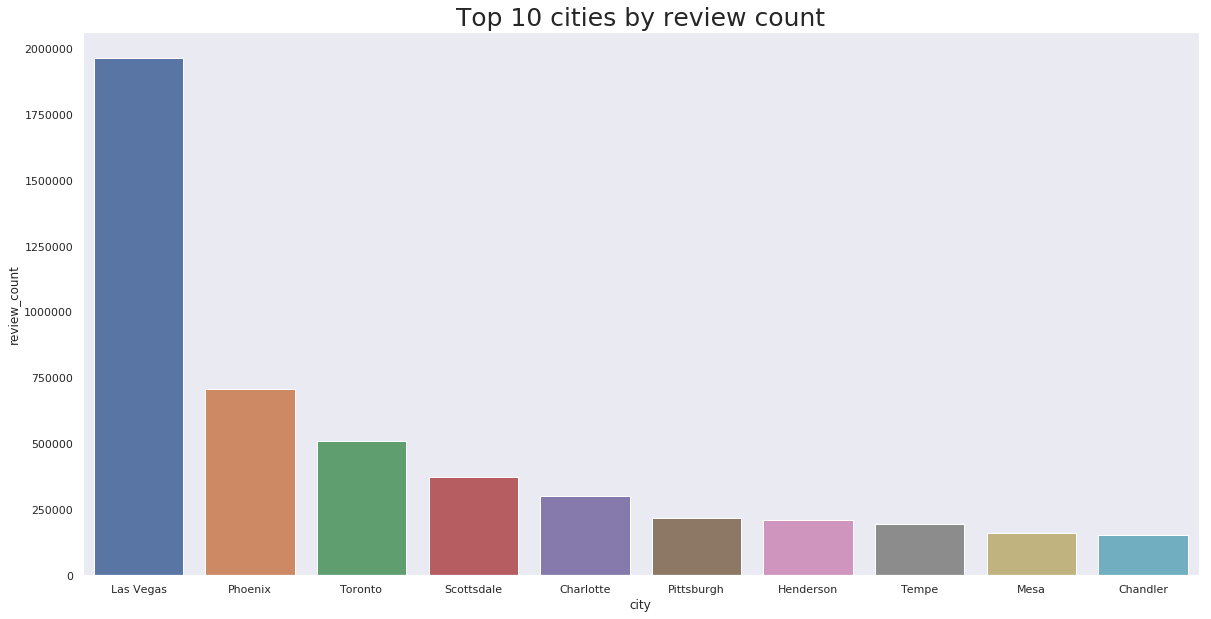

In [6]:
df_by_city = df[["city", "review_count"]].groupby("city").sum().sort_values(by="review_count", ascending=False).reset_index(drop=False)

plt.figure(figsize=(20, 10))
ax = sns.barplot(x="city", y="review_count", data=df_by_city.head(10)).set_title("Top 10 cities by review count", fontsize=25)

In [7]:
df = read_csv(BUSINESSS_BY_REVIEWS).sort_values(by="review_count", ascending=False)

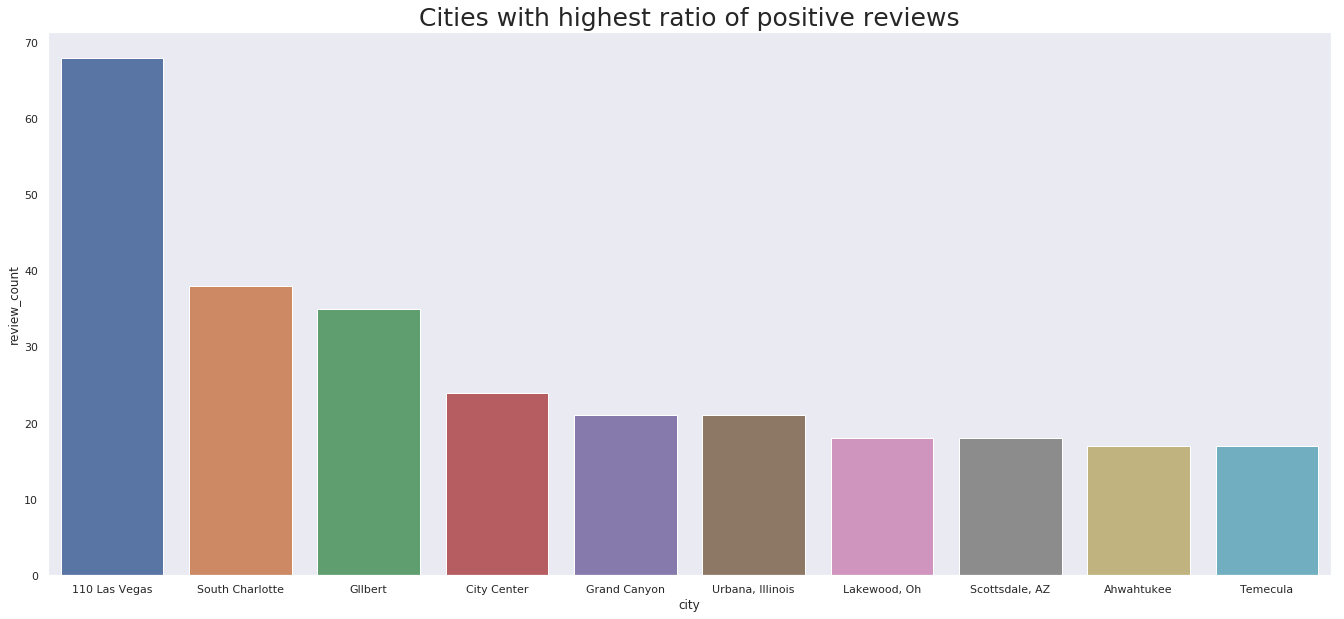

In [8]:
df_pos = df[["city", "stars", "review_count"]].groupby("city").mean().sort_values(by=["stars", "review_count"], ascending=False).reset_index(drop=False)

plt.figure(figsize=(23, 10))
ax = sns.barplot(x="city", y="review_count", data=df_pos.head(10)).set_title("Cities with highest ratio of positive reviews", fontsize=25)

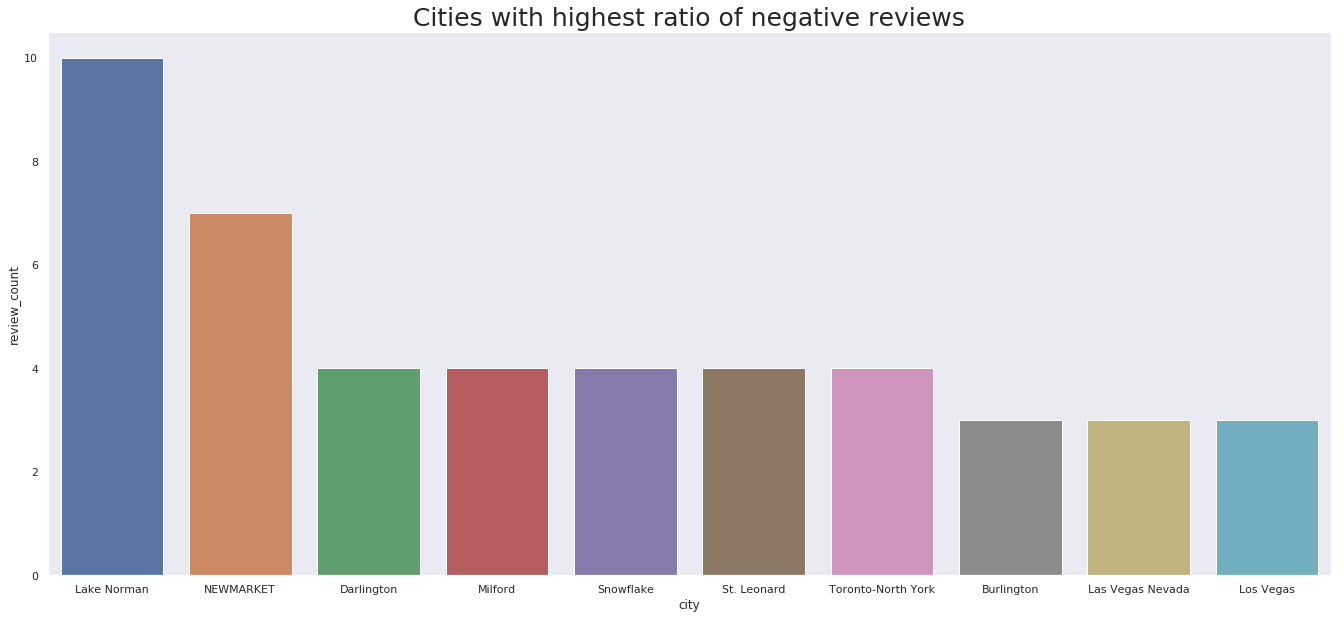

In [9]:
df_neg = df[["city", "stars", "review_count"]].groupby("city").mean().sort_values(by=["stars", "review_count"], ascending=[True, False]).reset_index(drop=False)

plt.figure(figsize=(23, 10))
ax = sns.barplot(x="city", y="review_count", data=df_neg.head(10)).set_title("Cities with highest ratio of negative reviews", fontsize=25)

In [10]:
df = read_csv(BUSINESSS_BY_IS_OPEN)
df.head()

,is_open,count
0,0,34084
1,1,158525


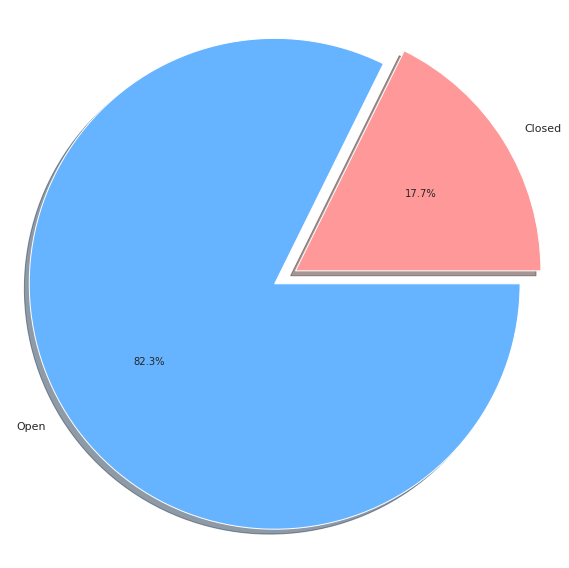

In [11]:
labels = ["Closed", "Open"]
sizes = list(df["count"])
colors = ["#ff9999","#66b3ff"]
explode = (0.1, 0)

fig1, ax1 = plt.subplots(figsize=(8, 8))
ax1.pie(sizes, labels=labels, explode=explode, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)
ax1.axis("equal")
plt.tight_layout()
plt.show()

In [12]:
df = read_csv(BUSINESSS_BY_CHECKINS)

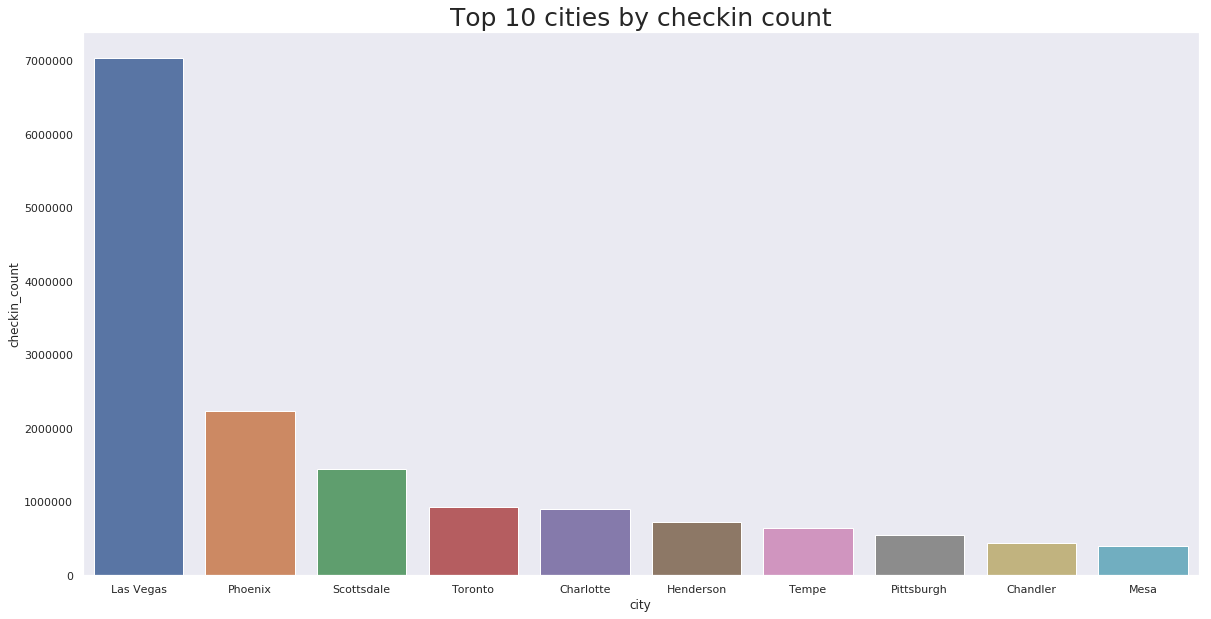

In [13]:
df_by_city = df[["city", "checkin_count"]].groupby("city").sum().sort_values(by="checkin_count", ascending=False).reset_index(drop=False)

plt.figure(figsize=(20, 10))
ax = sns.barplot(x="city", y="checkin_count", data=df_by_city.head(10)).set_title("Top 10 cities by checkin count", fontsize=25)

In [14]:
closed_df = df[df["is_open"] == 0]
opened_df = df[df["is_open"] == 1]

stars_avg = [["closed", closed_df["stars"].mean()], ["open", opened_df["stars"].mean()]]
checkins_avg = [["closed", closed_df["checkin_count"].mean()], ["open", opened_df["checkin_count"].mean()]]
reviews_avg = [["closed", closed_df["review_count"].mean()], ["open", opened_df["review_count"].mean()]]

stars_df = pd.DataFrame(stars_avg, columns=["", "average star"])
checkins_df = pd.DataFrame(checkins_avg, columns=["", "average checkin count"])
reviews_df = pd.DataFrame(reviews_avg, columns=["", "average review count"])

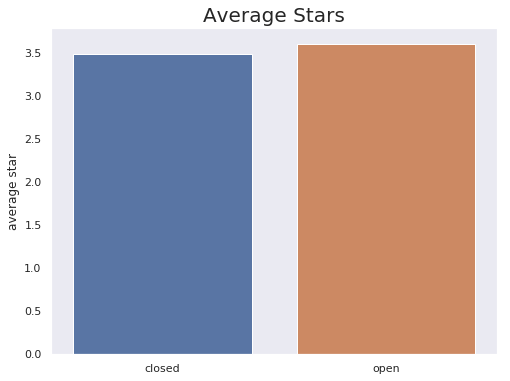

In [15]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x="", y="average star", data=stars_df).set_title("Average Stars", fontsize=20)

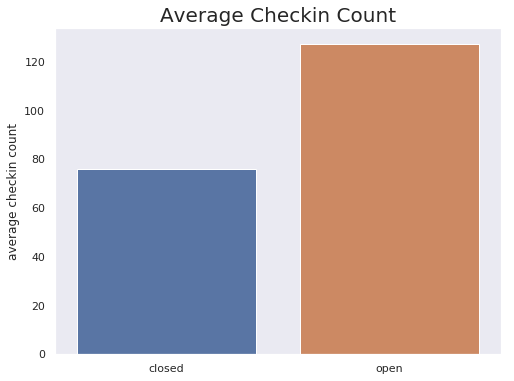

In [16]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x="", y="average checkin count", data=checkins_df).set_title("Average Checkin Count", fontsize=20)

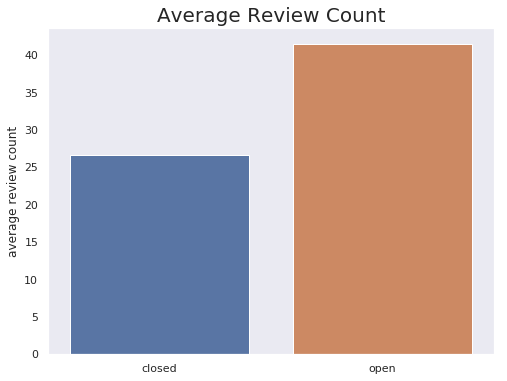

In [17]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x="", y="average review count", data=reviews_df).set_title("Average Review Count", fontsize=20)

In [18]:
df_top = read_csv(TOP_REVIEWS)
df_worst = read_csv(WORST_REVIEWS)

### Top reviews WordCloud

In [29]:
df_top.head(10)

,word,count
0,great,2418083
1,place,2123141
2,good,2117260
3,food,1992308
4,service,1426492
5,time,1365253
6,like,1290683
7,one,1215427
8,get,1198881
9,back,1115504


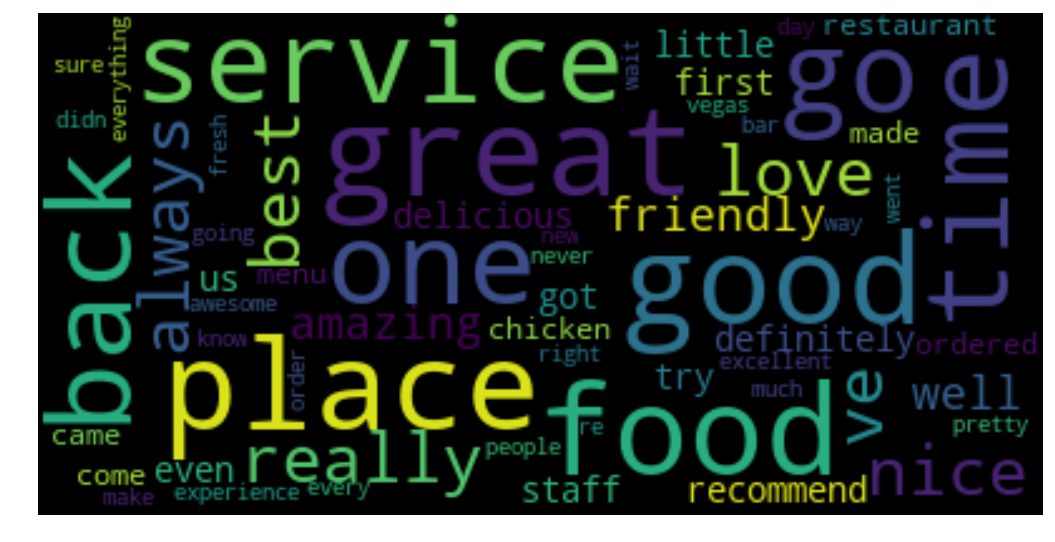

In [19]:
corpus = ""
for word in df_top["word"]:
    corpus += word + " "

top_wordcloud = WordCloud(max_font_size=50, max_words=60).generate(corpus)
plt.figure(figsize=(18, 10))
plt.imshow(top_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Worst reviews WordCloud

In [30]:
df_worst.head(10)

,word,count
0,food,1396625
1,good,1160294
2,place,1148219
3,like,1087315
4,get,1037191
5,service,1024307
6,one,1004942
7,time,976091
8,back,907784
9,go,764896


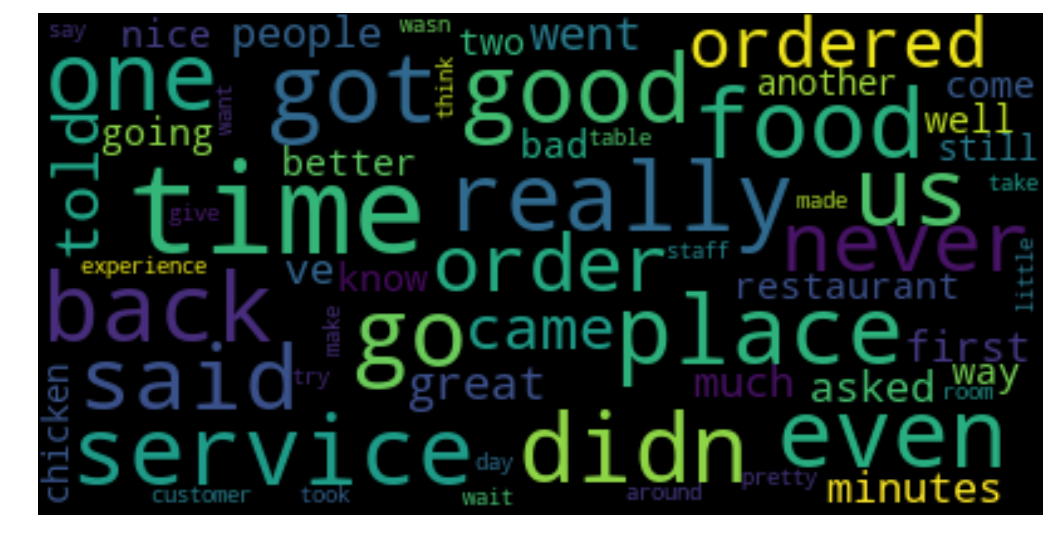

In [20]:
corpus = ""
for word in df_worst["word"]:
    corpus += word + " "

worst_wordcloud = WordCloud(max_font_size=50, max_words=60).generate(corpus)
plt.figure(figsize=(18, 10))
plt.imshow(worst_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Trending businesses

In [21]:
df = read_csv(BUSINESSS_BY_TRENDING)

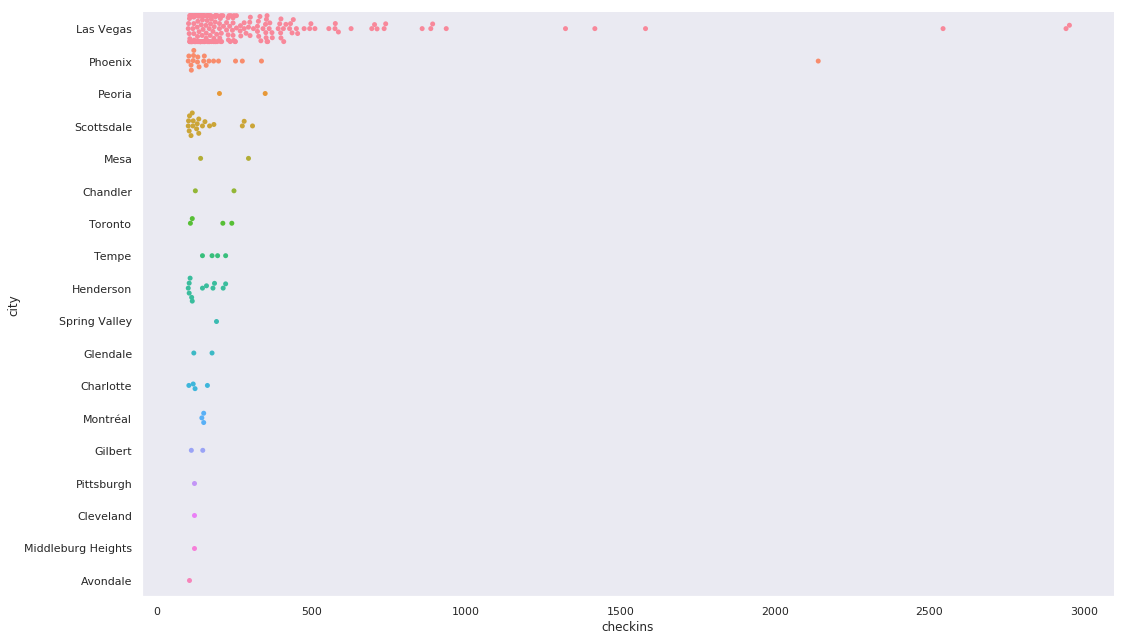

In [22]:
ax = sns.catplot(x="checkins", y="city", kind="swarm", data=df[df["checkins"] > 100], height=9, aspect=1.75)

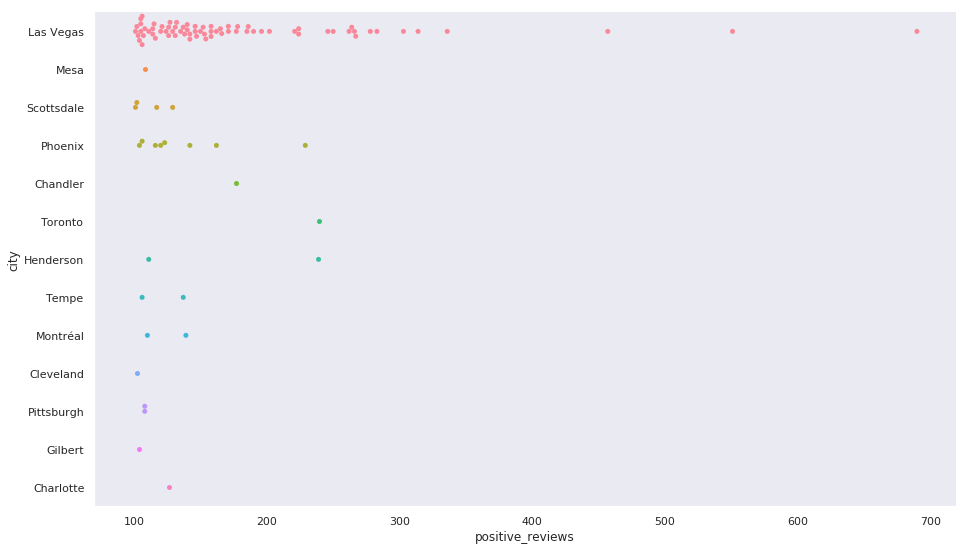

In [23]:
ax = sns.catplot(x="positive_reviews", y="city", kind="swarm", data=df[df["positive_reviews"] > 100], height=7.75, aspect=1.75)

### Checkins and positive reviews distributions for trending businesses

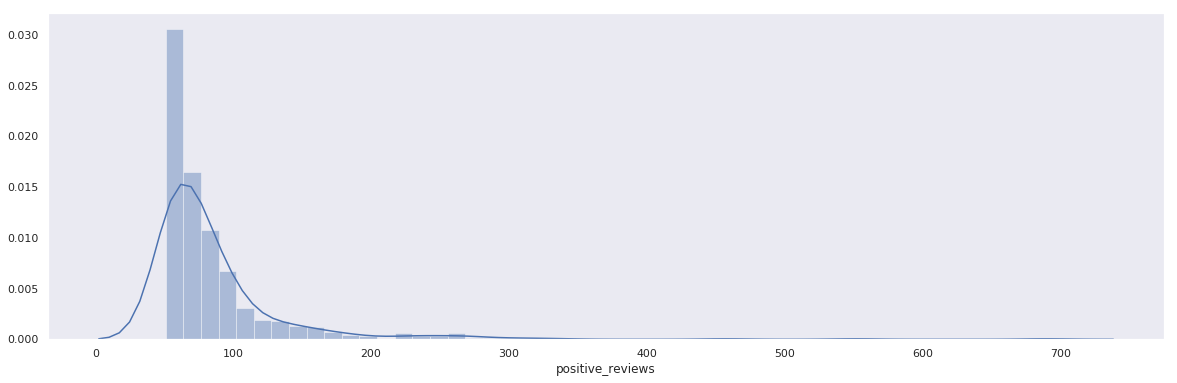

In [24]:
plt.figure(figsize=(20, 6))
ax = sns.distplot(df["positive_reviews"]);

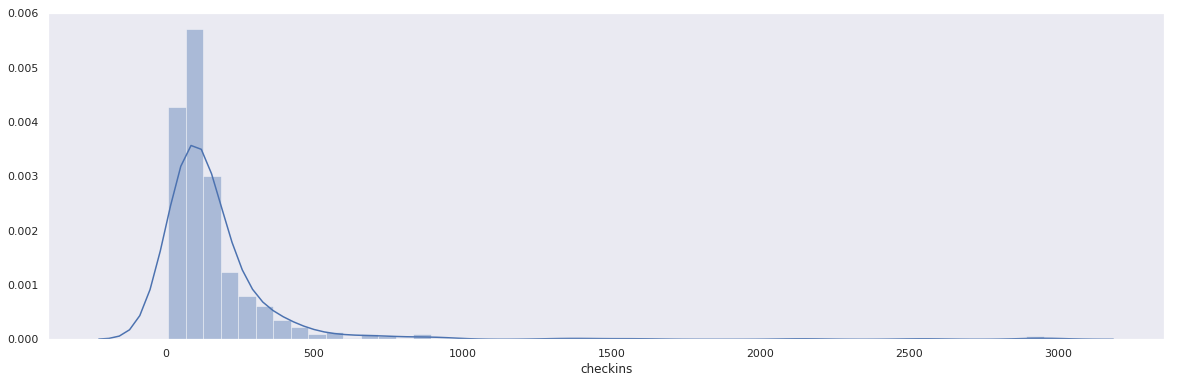

In [25]:
plt.figure(figsize=(20, 6))
ax = sns.distplot(df["checkins"].fillna(df["checkins"].mean()))

### Linear relationship between checkins and positive reviews for trending businesses

<Figure size 1080x720 with 0 Axes>

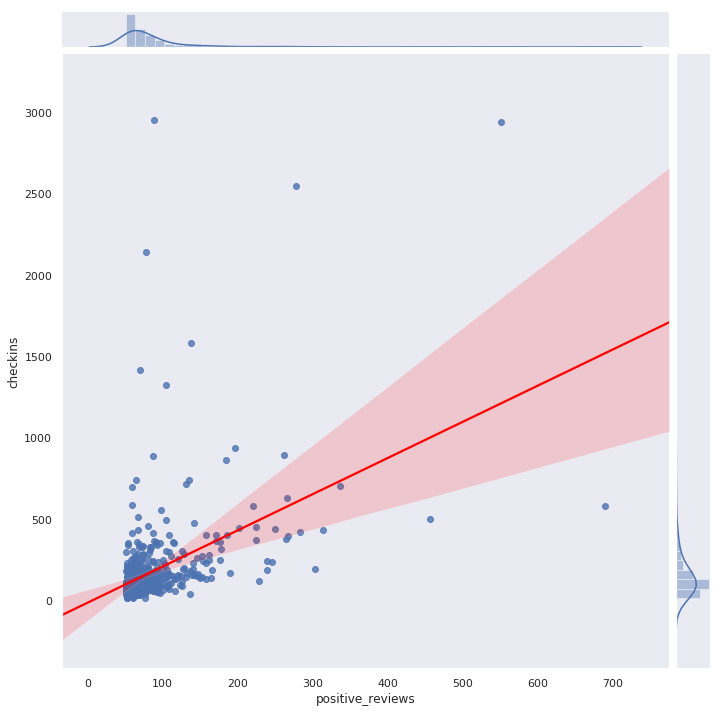

In [26]:
plt.figure(figsize=(15, 10))
ax = sns.jointplot(x = 'positive_reviews', y = 'checkins', data = df, kind = 'reg', height=10, ratio=15, joint_kws = {'line_kws':{'color':'red'}})

### Users

In [127]:
df = read_csv(USER_DETAILS)

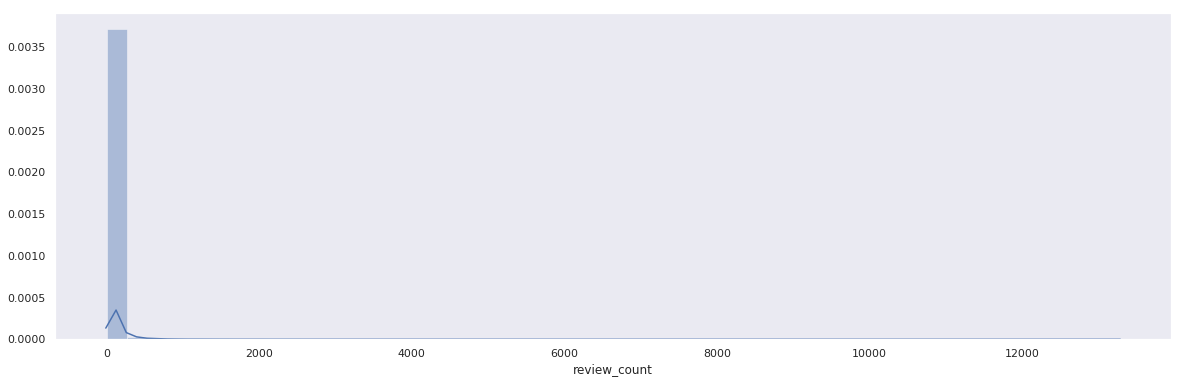

In [149]:
plt.figure(figsize=(20, 6))
ax = sns.distplot(df["review_count"].fillna(df["review_count"].mean()))

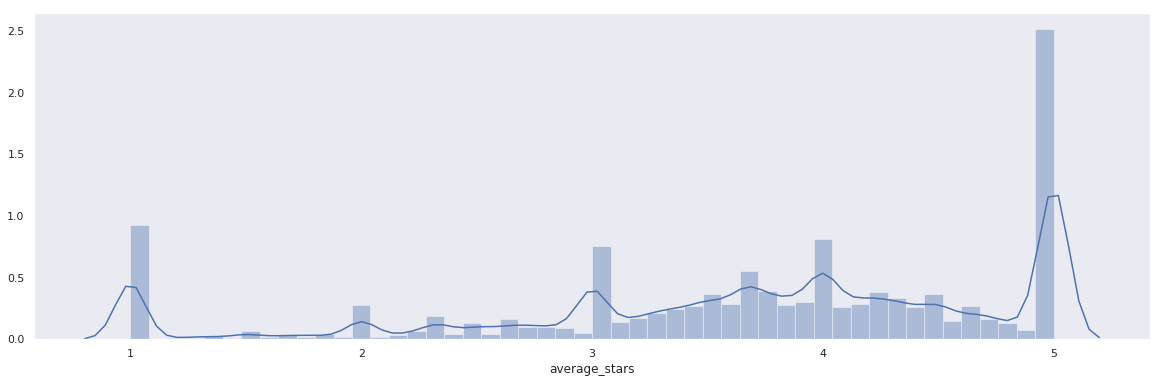

In [152]:
plt.figure(figsize=(20, 6))
ax = sns.distplot(df["average_stars"].fillna(df["average_stars"].mean()))

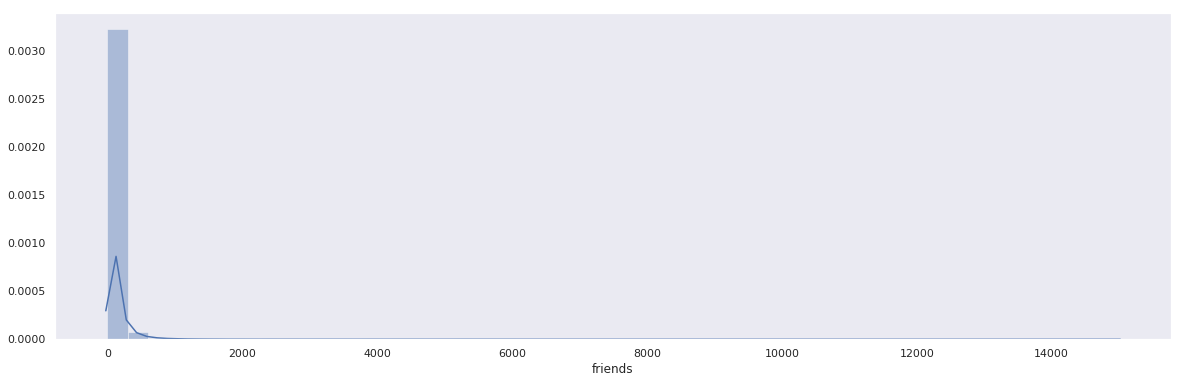

In [150]:
plt.figure(figsize=(20, 6))
ax = sns.distplot(df["friends"].fillna(df["friends"].mean()))

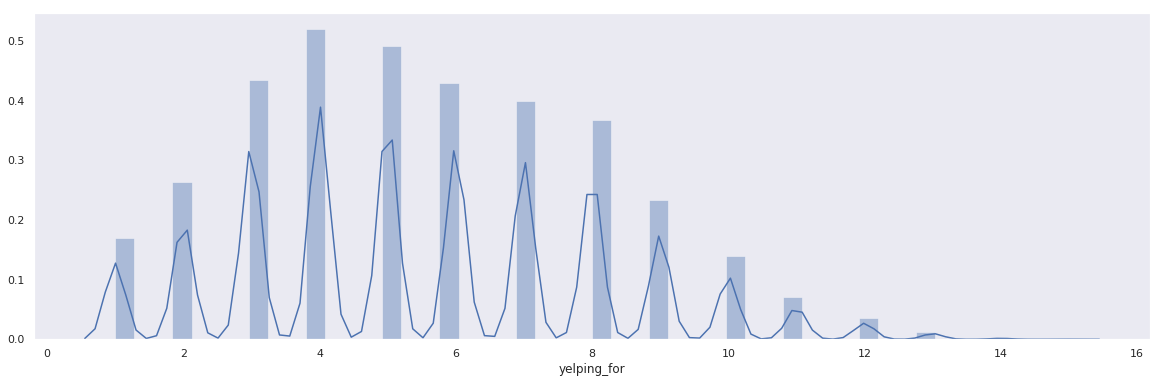

In [134]:
plt.figure(figsize=(20, 6))
ax = sns.distplot(df["yelping_for"].fillna(df["yelping_for"].mean()))

#### From correlation matrix and heatmap, we can see that there is no strong correlation between features

,review_count,average_stars,yelping_for,friends
review_count,1.000000,0.023018,0.260064,0.422897
average_stars,0.023018,1.000000,0.041713,0.053481
yelping_for,0.260064,0.041713,1.000000,0.094881
friends,0.422897,0.053481,0.094881,1.000000


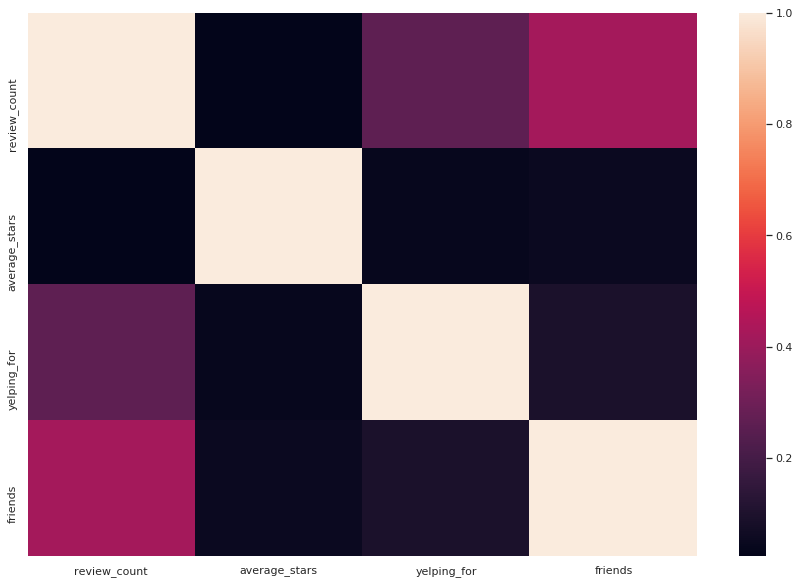

In [158]:
correlation = df.corr(method = 'pearson')

dims = (15, 10)
fig, ax = plt.subplots(figsize = dims)

sns.heatmap(ax = ax, data = correlation, xticklabels=correlation.columns, yticklabels=correlation.columns)
correlation

<Figure size 1080x720 with 0 Axes>

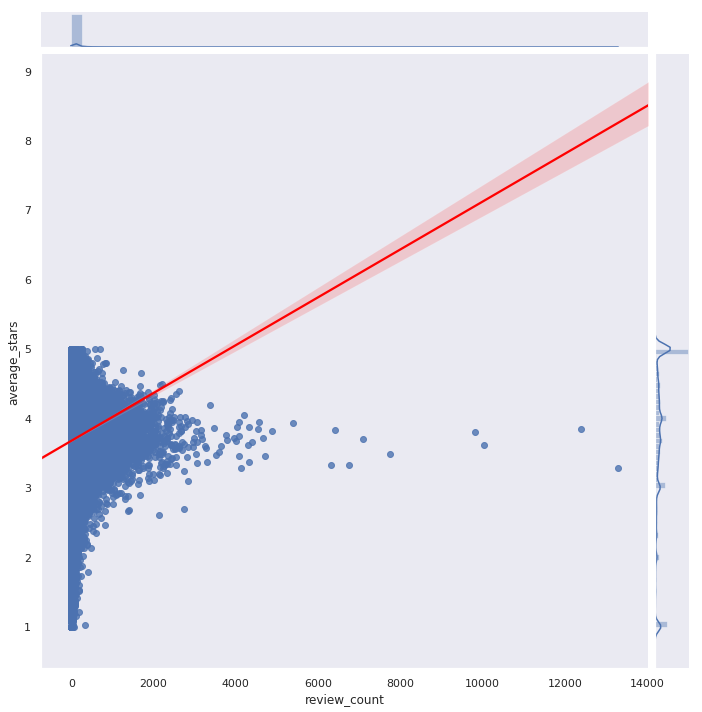

In [161]:
plt.figure(figsize=(15, 10))
ax = sns.jointplot(x = 'review_count', y = 'average_stars', data = df, kind = 'reg', height=10, ratio=15, joint_kws = {'line_kws':{'color':'red'}})

<Figure size 1080x720 with 0 Axes>

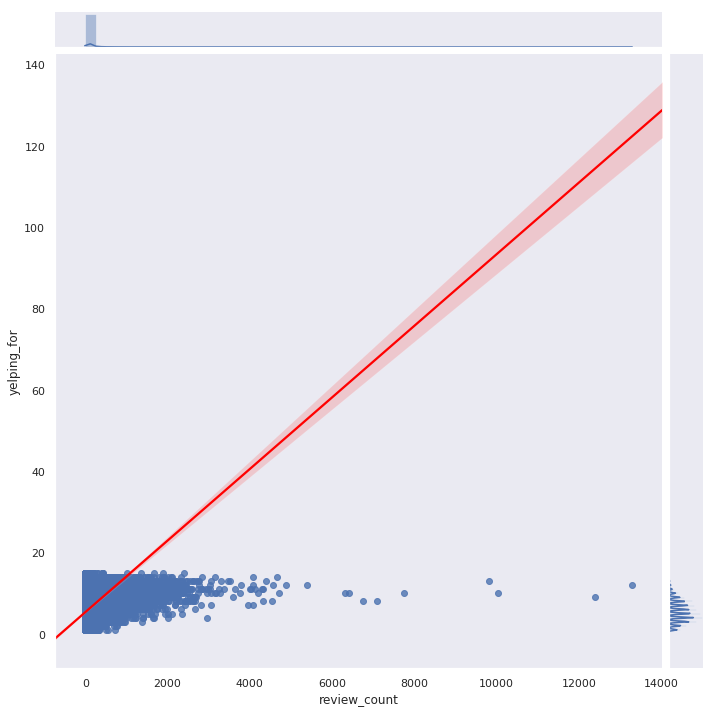

In [162]:
plt.figure(figsize=(15, 10))
ax = sns.jointplot(x = 'review_count', y = 'yelping_for', data = df, kind = 'reg', height=10, ratio=15, joint_kws = {'line_kws':{'color':'red'}})

<Figure size 1080x720 with 0 Axes>

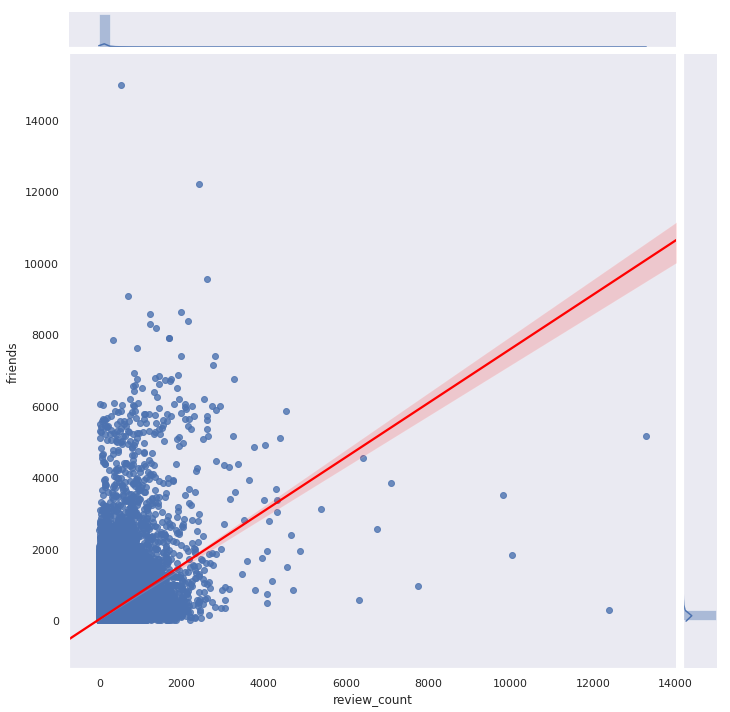

In [164]:
plt.figure(figsize=(15, 10))
ax = sns.jointplot(x = 'review_count', y = 'friends', data = df, kind = 'reg', height=10, ratio=15, joint_kws = {'line_kws':{'color':'red'}})

<Figure size 1080x720 with 0 Axes>

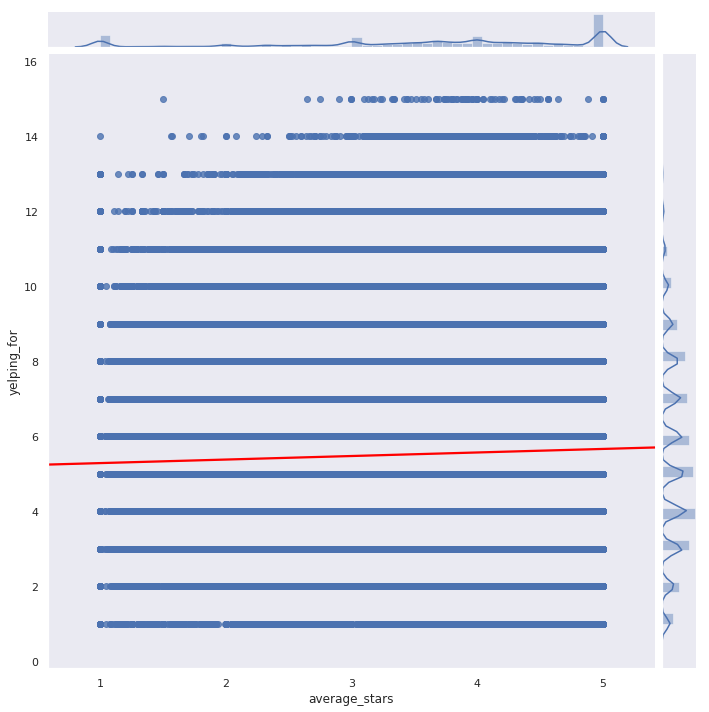

In [166]:
plt.figure(figsize=(15, 10))
ax = sns.jointplot(x = 'average_stars', y = 'yelping_for', data = df, kind = 'reg', height=10, ratio=15, joint_kws = {'line_kws':{'color':'red'}})

<Figure size 1080x720 with 0 Axes>

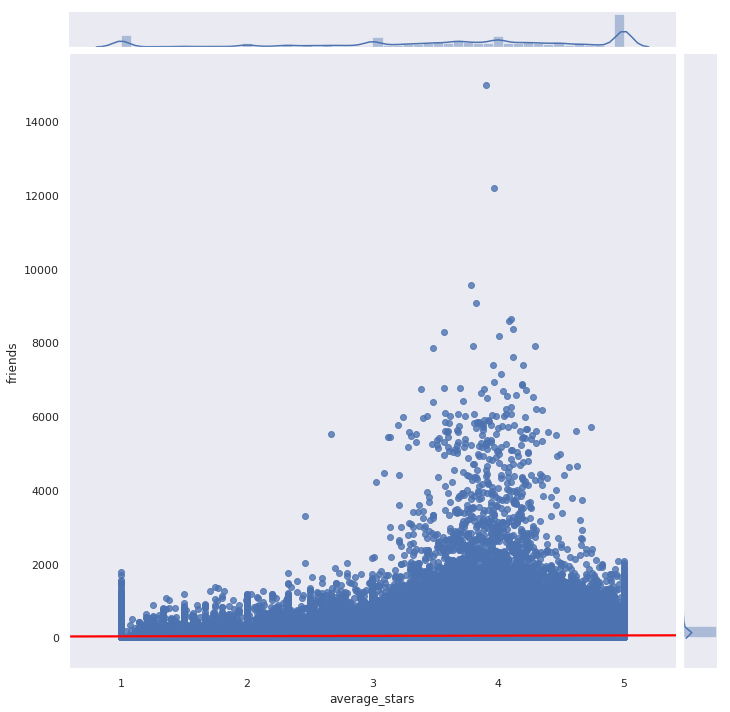

In [167]:
plt.figure(figsize=(15, 10))
ax = sns.jointplot(x = 'average_stars', y = 'friends', data = df, kind = 'reg', height=10, ratio=15, joint_kws = {'line_kws':{'color':'red'}})

<Figure size 1080x720 with 0 Axes>

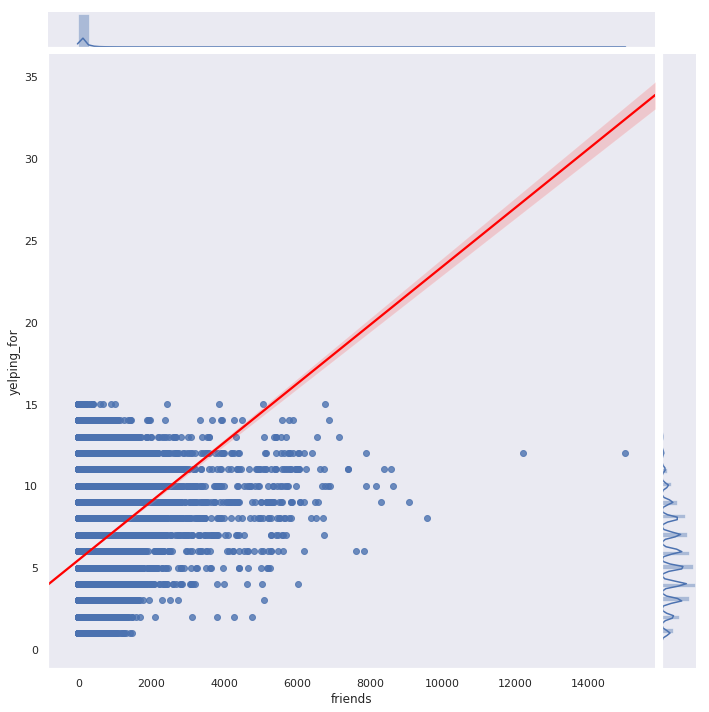

In [168]:
plt.figure(figsize=(15, 10))
ax = sns.jointplot(x = 'friends', y = 'yelping_for', data = df, kind = 'reg', height=10, ratio=15, joint_kws = {'line_kws':{'color':'red'}})

In [51]:
df = read_csv(CHECKIN_STATS)

In [129]:
def lineplot_df(df, column):
    time = ""
    if column == "year": time = column
    elif column == "month": time = column
    elif column == "day": time = column
    else: time = "hour"
    
    time_column = sorted(df[time].unique())
    checkins = [df[df[time] == value].size for value in time_column]
    return pd.DataFrame({time: time_column, "checkins": checkins})

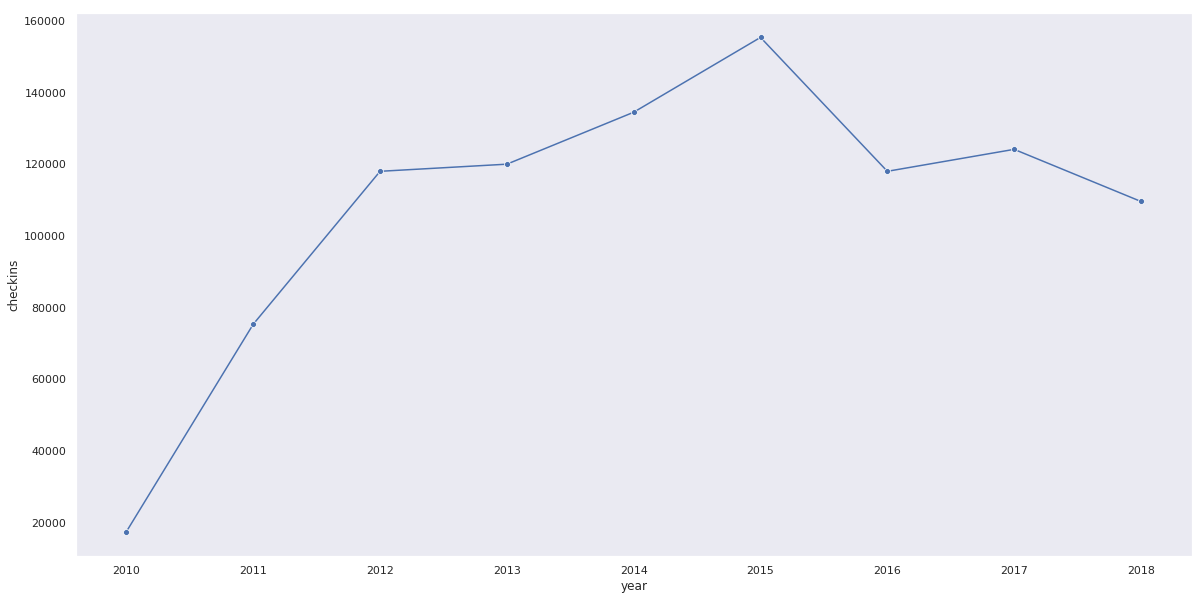

In [147]:
plt.figure(figsize=(20, 10))
ax = sns.lineplot(x="year", y="checkins", marker="o", data=lineplot_df(df, "year"))

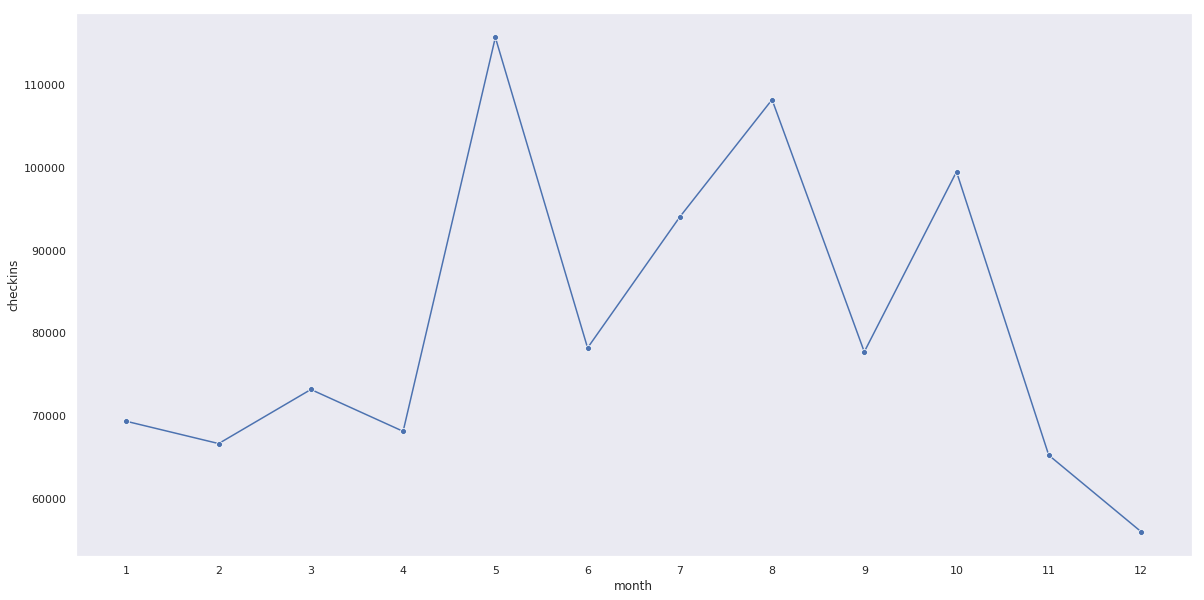

In [146]:
plt.figure(figsize=(20, 10))
ax = sns.lineplot(x="month", y="checkins", marker="o", data=lineplot_df(df, "month")).set(xticks=lineplot_df(df, "month")['month'].values)

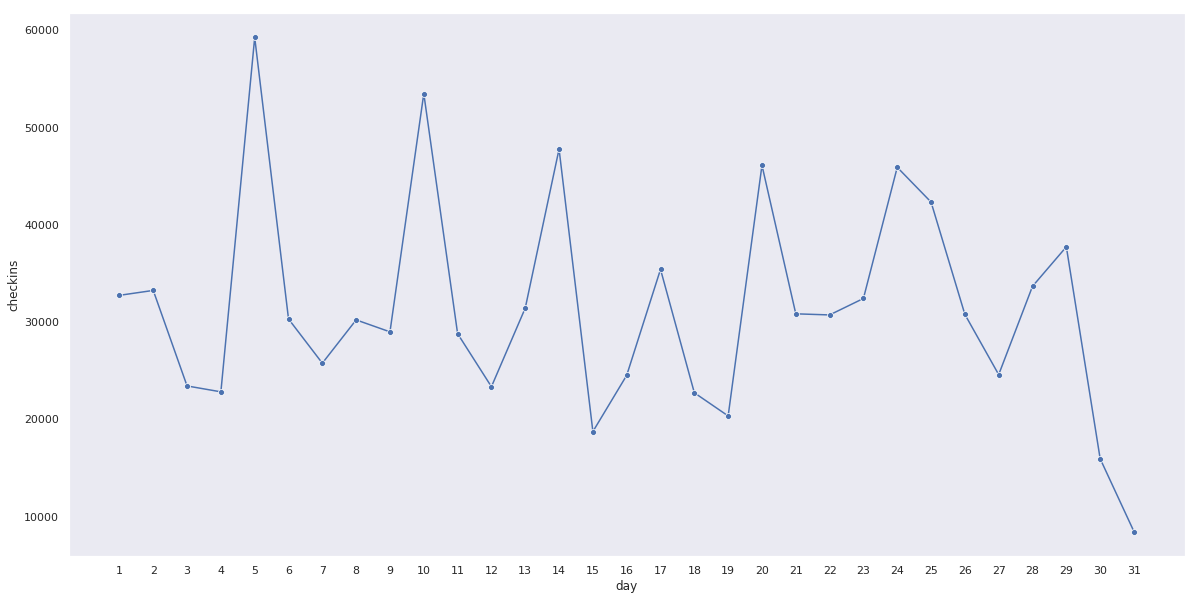

In [145]:
plt.figure(figsize=(20, 10))
ax = sns.lineplot(x="day", y="checkins", marker="o", data=lineplot_df(df, "day")).set(xticks=lineplot_df(df, "day")['day'].values)

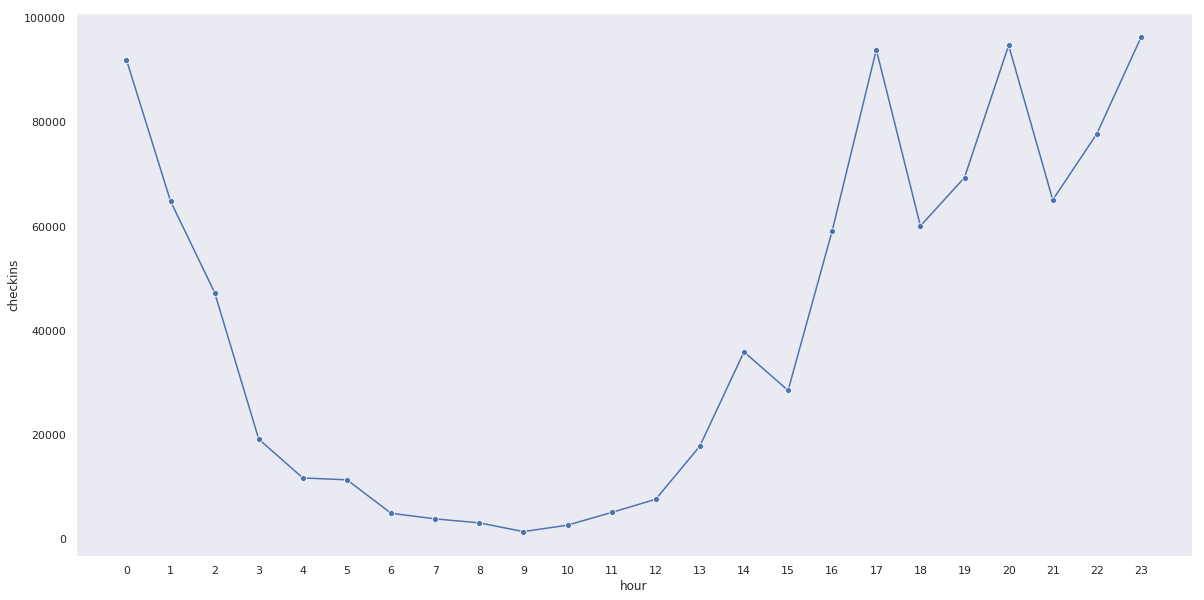

In [144]:
plt.figure(figsize=(20, 10))
ax = sns.lineplot(x="hour", y="checkins", marker="o", data=lineplot_df(df, "hour")).set(xticks=lineplot_df(df, "hour")['hour'].values)